# TinyML - Multinominal Naive Bayes Text Classifier with Bag-of-Words Feature Extraction

#### Federal University of Rio Grande do Norte

#### Name: Thommas Kevin Sales Flores


## 0. Install the libraries listed in the requirements.txt file

In [1]:
#!pip install -r requirements.txt

## 1. Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords   
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
plt.style.use('ggplot')

## 2. Load Dataset

In [3]:
data = {
    'text': [
        # Spam messages 
        'Free money now',  # spam
        'Buy one get one free',  # spam
        'Get cheap loans today',  # spam
        'Congratulations, you won a prize',  # spam
        'Limited time offer for cheap flights',  # spam
        'You have a chance to win $1000! Click here to claim',  # spam
        'Earn money from home, no experience required',  # spam
        'Exclusive offer: Get a free iPhone now!',  # spam
        'Hurry! Final days of our big sale',  # spam
        'Claim your free vacation package now',  # spam
        'Get rich quick with this simple trick',  # spam
        'Low interest loans available today',  # spam
        'You have a new credit card offer waiting',  # spam
        'Act now! Special offer for new customers',  # spam
        'Join our millionaire program for free',  # spam
        'Free trial for premium online dating',  # spam
        'Congratulations, you’ve been selected for a free gift!',  # spam
        'Limited time: Buy now and get 90% off!',  # spam
        'Your bank account has been compromised! Click here to verify',  # spam
        'Unlock exclusive access to top-tier jobs today',  # spam
        'Click here to receive your free coupon for discounts',  # spam
        'Get your free credit report today',  # spam
        'We found your perfect match on our dating site!',  # spam
        'Get access to the best online courses for free',  # spam
        'You’re pre-approved for a high-limit credit card!',  # spam
        'Free e-book download: How to make $1000 a day',  # spam
        'Buy now, pay later – easy installment plans',  # spam
        'Make money in your sleep with this proven system',  # spam
        'Get a $500 gift card just for signing up!',  # spam
        'Hurry, last chance to sign up for this exclusive offer!',  # spam
        'Final offer: Free iPad if you act now!',  # spam
        'Huge savings! Shop now for a limited-time deal',  # spam
        'Win a free laptop today by clicking here!',  # spam
        'No experience required! Start your own online business now',  # spam
        'Get your free trial of Netflix now',  # spam
        'Biggest sale of the year – up to 75% off!',  # spam
        'Want to make easy money? Start today with this program!',  # spam
        'Last chance! Free tickets to a major concert event!',  # spam
        'Special offer: Free consultation with our experts',  # spam
        'Get your free fortune reading today!',  # spam
        'Unlock huge savings on luxury watches',  # spam
        'Your account has been suspended, click here to reactivate',  # spam
        'Exclusive invitation: Join now and receive free gifts',  # spam
        'Want a free vacation? Click here for details',  # spam
        'Save up to 90% on the most popular software',  # spam
        
        # Ham messages 
        'Hi, how are you?',  # ham
        'Hello, want to catch up later?',  # ham
        'I miss you, call me!',  # ham
        'Are you free this weekend?',  # ham
        'See you at the meeting',  # ham
        'Let’s grab lunch tomorrow',  # ham
        'What time do we meet for the event?',  # ham
        'I just finished my project, want to hear about it?',  # ham
        'Hope you are doing well!',  # ham
        'Had a great time at the concert last night',  # ham
        'Are you still going to the gym later?',  # ham
        'Do you want to watch a movie tonight?',  # ham
        'Let me know if you need help with that task',  # ham
        'I’ll be back in town on Monday, let’s catch up',  # ham
        'Do you have any recommendations for a good restaurant?',  # ham
        'Can we meet up for coffee tomorrow?',  # ham
        'How’s the family doing?',  # ham
        'Do you need a ride to the airport tomorrow?',  # ham
        'Let’s plan a trip next month',  # ham
        'I’ll send you the files shortly',  # ham
        'Can we reschedule our meeting?',  # ham
        'Looking forward to seeing you at the party',  # ham
        'I’m really excited for the weekend trip',  # ham
        'I need to finish a few tasks, but then I’ll call you',  # ham
        'We should do something fun this Saturday',  # ham
        'Thanks for helping me with the project!',  # ham
        'I saw that movie you recommended – it was great!',  # ham
        'Let me know when you are free to chat',  # ham
        'Did you hear about the new restaurant in town?',  # ham
        'I’m going to try out that new workout class tomorrow',  # ham
        'Do you have any plans for the holidays?',  # ham
        'I’ll pick up some groceries on my way home',  # ham
        'Let’s get together for coffee this afternoon',  # ham
        'Are we still meeting for dinner tonight?',  # ham
        'I need to check my schedule for next week',  # ham
        'How’s the new job going?',  # ham
        'Let me know if you need any help with the presentation',  # ham
        'I’m heading to the park if you want to join',  # ham
        'How did your meeting go? I hope it went well',  # ham
        'I got your message – I’ll get back to you shortly',  # ham
        'Let’s catch up over the weekend',  # ham
        'I’ll bring the book I promised you tomorrow',  # ham
        'Do you want to meet up for a walk later?',  # ham
        'Can you help me with something later today?',  # ham
        'Let’s chat later, I’m a bit busy at the moment',  # ham
        'I need to get a few things done before the weekend',  # ham
        'I’ll call you when I get home',  # ham
        'Looking forward to our catch-up session tomorrow',  # ham
        'Do you need help with your project?',  # ham
        'How’s your day going so far?' # ham
    ],
    'label': [
        # Spam labels
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam',
        
        # Ham labels
         'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 
        'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 
        'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
        'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
        'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham'
    ]
}

In [4]:
df = pd.DataFrame(data)
df.head()

,text,label
0,Free money now,spam
1,Buy one get one free,spam
2,Get cheap loans today,spam
3,"Congratulations, you won a prize",spam
4,Limited time offer for cheap flights,spam


In [5]:
df.describe()

,text,label
count,95,95
unique,95,2
top,Free money now,ham
freq,1,50


In [6]:
label_counts = df['label'].value_counts()
label_counts

label
ham     50
spam    45
Name: count, dtype: int64

## 3. Exploratory Data Analysis

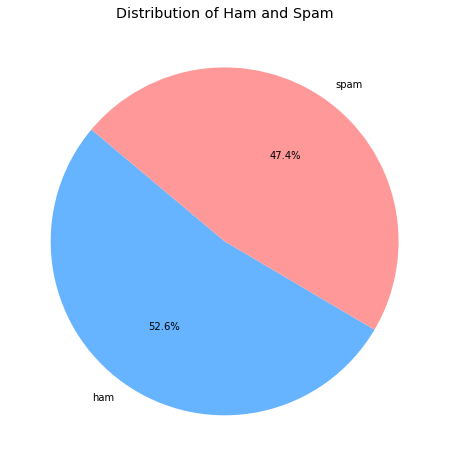

In [7]:
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Ham and Spam')
plt.show()

### 3.1 Spam

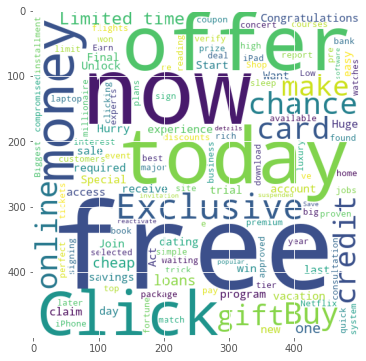

In [8]:
wc_spam = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc_spam.generate(df[df['label'] == 'spam']['text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(wc_spam)
plt.show()

### 3.2 Not Spam

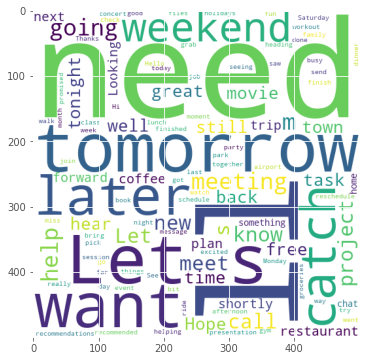

In [9]:
wc_spam = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc_spam.generate(df[df['label'] == 'ham']['text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(wc_spam)
plt.show()

## 4. Removing Stop Words words

In [10]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
Count_Vectorizer = CountVectorizer()
Tfidf_Vectorizer = TfidfVectorizer(max_features = 3000)

## 5. Extract features using Bag of Words

In [12]:
X = Count_Vectorizer.fit_transform(df['text'])
y = df['label']

## 6. Splitting the data

In [13]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

## 7. Define the model

In [14]:
classifier = MultinomialNB()

## 8. Training the model

In [15]:
classifier.fit(X_train, y_train)

MultinomialNB()

## 9. Model Evaluation

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
accuracy = accuracy_score(np.where(y_test == 'spam', 1, 0), np.where(y_pred == 'spam', 1, 0))
precision = precision_score(np.where(y_test == 'spam', 1, 0), np.where(y_pred == 'spam', 1, 0))


In [18]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Accuracy: 1.0
Precision: 1.0

Classification Report:
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00         8
        spam       1.00      1.00      1.00        11

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



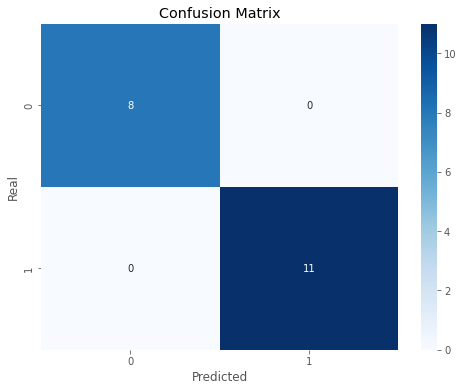

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

## 10. Obtaining the model to be implemented in the microcontroller

In [20]:
# Extract log-probabilities for each class (spam and ham)
log_probs = classifier.feature_log_prob_

# Print log-probabilities for both classes
log_probs_spam = log_probs[0]  # Log-probabilities for the "spam" class
log_probs_ham = log_probs[1]   # Log-probabilities for the "ham" class
vocabulary = Count_Vectorizer.get_feature_names_out()
print('len_vocabulary: ', len(vocabulary)) # you need change this parameter in arduino code.

len_vocabulary:  280


In [21]:
def generate_cpp_code(log_probs_spam, log_probs_ham, vocabulary):

    cpp_code = "const char* vocabulary[] = {"

    for i, word in enumerate(vocabulary):
        cpp_code += f'"{word}"'
        if i <  len(vocabulary)-1:
            cpp_code += ','
    cpp_code += "}; \n\n"



    cpp_code += "const float log_probs_spam[] = {"

    for i, log_prob in enumerate(log_probs_spam):
        cpp_code += f'{log_prob}'
        if i <  len(log_probs_spam)-1:
            cpp_code += ','
    cpp_code += "}; \n\n"


    cpp_code += "const float log_probs_ham[] = {"

    for i, log_prob in enumerate(log_probs_ham):
        cpp_code += f'{log_prob}'
        if i <  len(log_probs_ham)-1:
            cpp_code += ','
    cpp_code += "}; \n\n"

    return cpp_code


## 11. Saves the template in a .h file

In [22]:
model = generate_cpp_code(log_probs_spam, log_probs_ham, vocabulary)

In [23]:
with open(f'./ArduinoCode/MultinomialNB.h', 'w') as file:
    file.write(model)